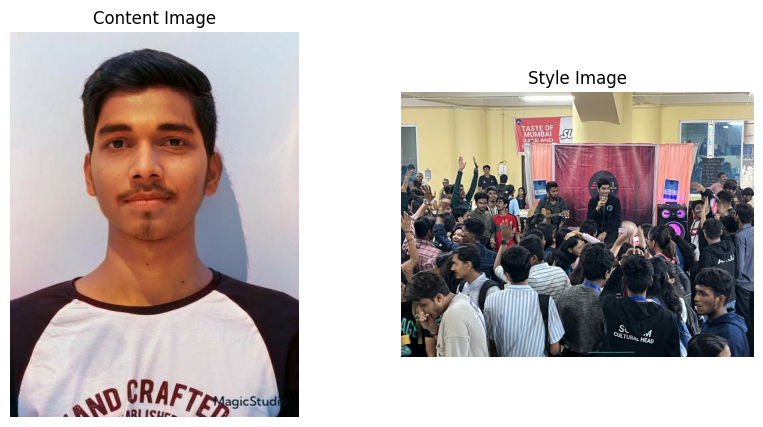

In [9]:
# Import necessary libraries
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Load the model from TensorFlow Hub
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Define the function to load an image
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]  # Add batch dimension
    return img

# Load content and style images
content_image = load_image(r'C:\Users\Ravi Chaurasiya\Downloads\image\aditya image.jpeg')
style_image = load_image(r'C:\Users\Ravi Chaurasiya\Downloads\image\aditya ka style.jpg')

# Convert TensorFlow tensors to NumPy arrays
content_image_np = content_image.numpy()
style_image_np = style_image.numpy()

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the content image
ax[0].imshow(np.squeeze(content_image_np))
ax[0].set_title('Content Image')
ax[0].axis('off')  # Remove axis labels for a cleaner display

# Display the style image
ax[1].imshow(np.squeeze(style_image_np))
ax[1].set_title('Style Image')
ax[1].axis('off')  # Remove axis labels for a cleaner display

plt.show()


In [2]:
# import os

# print(os.path.exists(r'C:\Users\Ravi Chaurasiya\Downloads\image\aditya ka style.jpg'))
# print(os.path.exists(r'C:\Users\Ravi Chaurasiya\Downloads\image\aditya image.jpeg'))


True
True


In [5]:
# # Check if images are loaded correctly
# print("Content image shape:", content_image.shape)
# print("Style image shape:", style_image.shape)


Content image shape: (1, 1200, 1600, 3)
Style image shape: (1, 577, 433, 3)


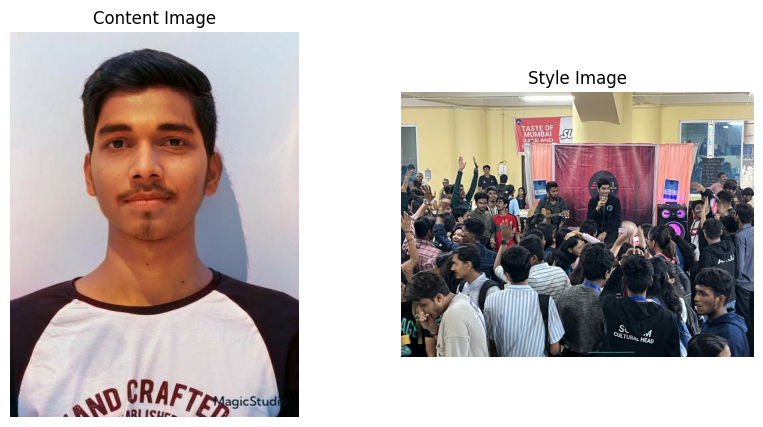

In [15]:
# # Convert TensorFlow tensors to NumPy arrays
# content_image_np = content_image.numpy()
# style_image_np = style_image.numpy()

# # Create a figure with two subplots
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# # Display the content image
# ax[0].imshow(np.squeeze(content_image_np))
# ax[0].set_title('Content Image')
# ax[0].axis('off')  # Remove axis labels for a cleaner display

# # Display the style image
# ax[1].imshow(np.squeeze(style_image_np))
# ax[1].set_title('Style Image')
# ax[1].axis('off')  # Remove axis labels for a cleaner display

# plt.show()


In [10]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

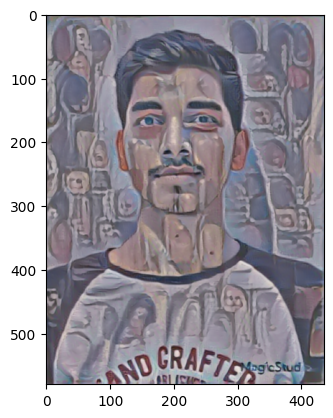

In [11]:
plt.imshow(np.squeeze (stylized_image)) 
plt.show()

In [14]:

# Assuming stylized_image is a TensorFlow tensor
stylized_image_np = stylized_image.numpy()  # Convert TensorFlow tensor to NumPy array

# Normalize image if necessary
stylized_image_np = (stylized_image_np * 255).astype(np.uint8)  # Convert to 8-bit image

# Convert to BGR format
stylized_image_bgr = cv2.cvtColor(np.squeeze(stylized_image_np), cv2.COLOR_RGB2BGR)

# Save the image
cv2.imwrite('generated_img.jpg', stylized_image_bgr)
cv2.imwrite(r'C:\Users\Ravi Chaurasiya\Downloads\image\generated_img.jpg', stylized_image_bgr)


True